# Домашняя работа №1

## NumPy

Все задачи из блока ниже нужно решить, не используя циклов (`for`, `while`, `list comprehension`, `apply`, `np.vectorize`, `np.fromfunction` и так далее, создать новые объекты при помощи встроенноых `numpy` генераторов можно) в реализации. Также для каждой задачи нужно написать проверку: создать какой-то пример, написать для него решение и проверить, что реализованная функция для этого примера возвращает объект, который совпадает с решением. Например:

```python
example = np.eye(5)
solution = 2 * np.eye(5)

result = double_all_elements(example)
assert np.allclose(result, solution)
```

In [460]:
import numpy as np

### Задание 1 (0.5 балла)

Реализуйте функцию, которая из двух векторов $X$ и $Y$ размерности $n$ строит матрицу размерности $(n, 2)$ ($n$ - произвольное)

In [461]:
x = np.array([1,2,3]).T
x

array([1, 2, 3])

In [462]:
def ex1(x, y):
  return np.column_stack((x,y)).T

  
x = np.array([1, 2, 3])
y = np.array([3, 4, 5])
result = np.array([[1, 2, 3],
                   [3, 4, 5]])
assert np.allclose(ex1(x,y), result)

### Задание 2  (0.5 балла)

Реализуйте функцию, которая для произвольной матрицы $X$ возвращает среднее значение положительных диагональных элементов

In [463]:
def ex2(x):
  a = x.diagonal()
  return a[a>0].mean()
x = np.array([[-1, 2, 3],
              [3, 4, 5],
              [6, 7, 8]])
a = x.diagonal()
res = 6

assert np.allclose(ex2(x), res)

### Задание 3  (0.5 балла)

Реализуйте функцию, которая для произвольной матрицы $X$ и произвольного числа $k$ заменяет все диагональные элементы матрицы на $k$ (функция не должна ничего возвращать, только модифицировать заданную матрицу)

In [464]:
def ex3(x, k):
  x[np.diag_indices_from(x)] = k


x = np.array([[-1, 2, 3],
              [3, 4, 5],
              [6, 7, 8]])
k = 0
ex3(x, k)
res = np.array([[0, 2, 3],
                   [3, 0, 5],
                   [6, 7, 0]])
assert np.allclose(x,res)

### Задание 5  (0.5 балла)

Реализуйте функцию, которая проверяет, являются ли две матрицы $X$ и $Y$ одинаковыми (совпадают размерности и значения), если их преобразовать в вектор построчно (например, для `np.array([[0, 1, 2], [3, 4, 5]])` построчное преобразование в вектор - это `np.array([0, 1, 2, 3, 4, 5])`. 

Функция должна возвращать `True`, если матрицы одинаковые, иначе `False`.

In [465]:
def ex5(x, y):
  return np.array_equal(x.flatten(), y.flatten())


x = np.array([[-1, 2, 3],
              [3, 4, 5],
              [6, 7, 8]])
y = np.array([-1, 2, 3, 3, 4, 5, 6, 7, 8])
res1 = True
assert ex5(x,y) == res1

res2 = False
x = np.array([[-1, 2, 3],
              [3, 4, 5],
              [6, 7, 8]])
y = np.array([-1, 2, 3, 3, 5, 5, 6, 7, 8])
assert ex5(x,y) == res2

### Задание 4  (1 балл)

Реализуйте функцию, которая для произвольной матрицы $X$ и произвольного числа k возвращает вектор, состоящий из тех значений $x_{ij}$, для которых верно равенство $(i + j) \bmod k = 0$

In [466]:
def ex4(x, k):
  a = np.mgrid[1:x.shape[0]+1, 1:x.shape[1]+1]
  b = a[0] + a[1]
  return x[b%k == 0]

x = np.array([[-1, 2, 3],
              [3, 4, 5],
              [6, 7, 8]])

y = np.array([[-1, 2, 6],
              [3, 4, 5]])

res = np.array([-1,  3,  4,  6,  8])

assert np.allclose(ex4(x,2), res)

res2 = np.array([2, 3])
assert np.allclose(ex4(y, 3), res2)


### Задание 6 (1 балл)

В numpy пропущенное значение (`np.nan`) имеет тип `float`:

In [467]:
type(np.nan)

float

Из-за этого любой числовой массив, содержащий пропущенные значения, будет автоматически иметь тип `float`:

In [468]:
t = np.array([1, 2, 3, np.nan])
t

array([ 1.,  2.,  3., nan])

In [469]:
t.dtype

dtype('float64')

Реализуйте функцию, которая для произвольной матрицы $X$ будет заменять все пропущенные значения на среднее значение в соответствующей строке, округленное до целого. Также эта функция должна поменять тип матрицы с `float` на `int`, если она после этого преобразования состоит только из целых чисел (считаем, что `3.0` - это целое число). В этой задаче можно создать и вернуть новый объект.

In [470]:
def isinteger(x):
  return np.equal(np.mod(x, 1), 0)

def ex6(x):
  colmean = np.nanmean(x, axis = 1)
  colmean[colmean%1 == 0.5] += 0.0000000001
  colmean = colmean.round()
  Indxs = np.where(np.isnan(x))
  x[Indxs] = np.take(colmean, Indxs[1])
  if isinteger(x).all():
    return x.astype(int)
  return x

x = np.array([[-1, 2, 3.0],
              [3, np.nan, 5],
              [6, 7, np.nan]])
l = ex6(x)
res = np.array([[-1, 2, 3],
                [3, 4, 5],
                [6, 7,  7]])
assert l.dtype == np.int64
assert np.allclose(l, res)

x = np.array([[-1, 2, 3.0],
              [3.3, np.nan, 5],
              [6, 7, np.nan]])
l = ex6(x)
res = np.array([[-1. ,  2. ,  3. ],
                [ 3.3,  4. ,  5. ],
                [ 6. ,  7. ,  7. ]])
assert l.dtype == np.float64
assert np.allclose(l, res)


### Задание 7 (1.5 балла)

С помощью библиотеки `numba` и декоратора `numba.njit` реализуйте функцию, которая для заданной матрицы, состоящей из положительных чисел, выполняет следующее:

1) Все нулевые элементы массива заменяются на случайное целое число от 0 до 100 (без создания копии массива);

2) Возвращает среднее значение квадратных корней элементов матрицы (то есть значение $K = \frac{1}{N\cdot M}\sum_{i=1}^N \sum_{j=1}^M \sqrt{x_{ij}}$);

Сравните скорость работы функции с декоратором и без декоратора. Попробуйте также задать разные значения `parallel` и `fastmath` при использовании декоратора. Опишите, как это влияет на скорость работы и попробуйте предположить, почему получаются такие результаты.

Матрица $X$ задана следующим образом:

In [471]:
X = np.random.randint(0, 1000, size=(1000, 100))
X

array([[357, 741, 979, ..., 217, 606, 550],
       [554, 317, 343, ..., 826, 854, 937],
       [374,  26, 292, ..., 681, 918,  70],
       ...,
       [872, 986, 559, ..., 472,  94, 674],
       [863, 821, 432, ..., 883, 863, 533],
       [ 55, 823, 894, ..., 165, 520, 666]])

$\textbf{Важно:}$ Попробуйте решить задачу без использования циклов. Если не получается сделать решение без циклов, то приведите реализацию с циклами. Подробно опишите полученные результаты, за отсутствие интерпретации будут снижаться баллы.

In [472]:
import numba


In [473]:
@numba.njit
def ex7_bebe(X):
  mask = X==0
  mask = np.asarray(mask)
  values = np.random.randint(0, 100, size=(1000, 100))
  values = np.atleast_1d(np.asarray(values))
  
  for idx in range(a.size):
      if mask.flat[idx]:
          X.flat[idx] = values.flat[idx % len(values)]

  return np.sum(np.sqrt(X))/(X.shape[0]*X.shape[1])

In [474]:
def ex7(X):
  mask = X==0
  o = np.copy(X)
  np.putmask(X, mask, np.random.randint(0, 100, size=(1000, 100)))
  return np.sum(np.sqrt(X))/(X.shape[0]*X.shape[1])


In [475]:
%%timeit
X = np.random.randint(0, 1000, size=(1000, 100))
ex7(X)

2.4 ms ± 62.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Заменю-ка я np.putmask на функцию практически из Numba https://github.com/numba/numba/issues/7374  
https://github.com/numba/numba/pull/5789 


In [476]:
@numba.njit
def ex7_1(X):
  mask = X==0
  mask = np.asarray(mask)
  values = np.random.randint(0, 100, size=(1000, 100))
  values = np.atleast_1d(np.asarray(values))
  
  for idx in range(a.size):
      if mask.flat[idx]:
          X.flat[idx] = values.flat[idx % len(values)]

  return np.sum(np.sqrt(X))/(X.shape[0]*X.shape[1])


In [477]:
%%timeit
X = np.random.randint(0, 1000, size=(1000, 100))
ex7_1(X)

1.91 ms ± 35.7 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [478]:
@numba.njit(parallel = True)
def ex7_2(X):
  mask = X==0
  mask = np.asarray(mask)
  values = np.random.randint(0, 100, size=(1000, 100))
  values = np.atleast_1d(np.asarray(values))
  
  for idx in range(a.size):
      if mask.flat[idx]:
          X.flat[idx] = values.flat[idx % len(values)]

  return np.sum(np.sqrt(X))/(X.shape[0]*X.shape[1])


In [479]:
%%timeit
X = np.random.randint(0, 1000, size=(1000, 100))
ex7_2(X)

1.86 ms ± 67.1 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [480]:
@numba.njit(fastmath = True)
def ex7_3(X):
  mask = X==0
  mask = np.asarray(mask)
  values = np.random.randint(0, 100, size=(1000, 100))
  values = np.atleast_1d(np.asarray(values))
  
  for idx in range(a.size):
      if mask.flat[idx]:
          X.flat[idx] = values.flat[idx % len(values)]

  return np.sum(np.sqrt(X))/(X.shape[0]*X.shape[1])


In [481]:
%%timeit
X = np.random.randint(0, 1000, size=(1000, 100))
ex7_3(X)

2.13 ms ± 387 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [482]:
@numba.njit(fastmath = True, parallel = True)
def ex7_4(X):
  mask = X==0
  mask = np.asarray(mask)
  values = np.random.randint(0, 100, size=(1000, 100))
  values = np.atleast_1d(np.asarray(values))
  
  for idx in range(a.size):
      if mask.flat[idx]:
          X.flat[idx] = values.flat[idx % len(values)]

  return np.sum(np.sqrt(X))/(X.shape[0]*X.shape[1])

In [483]:
%%timeit
X = np.random.randint(0, 1000, size=(1000, 100))
ex7_4(X)

1.79 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


Мои выводы: при parallel = True вычисление идет параллельно, что ускоряет работу  
При fastmath скорость чуть увеличивается, в силу упрощения порядка вычислений
Однако бывало, что при этих аргументах функция работала медленее  
Не знаю, как объяснить

## Pandas

Для выполнения следующих заданий нам потребуется датасет `iris`:

In [484]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Задание 1 (0.25 балла)

Для столбца `sepal_length` посчитайте среднее значение, среднее квадратичное отклонение и медиану по каждому классу из `species`.

In [485]:
species_un = iris["species"].unique()
species_un
for spec in species_un:
  cur = iris[iris['species']==spec]['sepal_length']
  print(f"{spec} mean length: {cur.mean()}")
  print(f"{spec} std length: {cur.std()}")
  print(f"{spec} median length: {cur.median()}")

setosa mean length: 5.006
setosa std length: 0.35248968721345136
setosa median length: 5.0
versicolor mean length: 5.936
versicolor std length: 0.5161711470638634
versicolor median length: 5.9
virginica mean length: 6.587999999999998
virginica std length: 0.6358795932744322
virginica median length: 6.5


### Задание 2 (0.25 балла)

Посчитайте количество строк в датасете, которое удовлетворяет условию: `species == 'setosa'` и `sepal_width > 3.2`

In [486]:
len(iris.loc[(iris["species"] == 'setosa') & (iris["sepal_width"] > 3.2)])

33

### Задание 3 (0.5 балла)

Реализуйте функцию, которая возвращает датасет, в котором нет строк с одновременно одинаковыми значениями `sepal_width` и `species`

In [487]:
iris.drop_duplicates(subset=["sepal_width", "species"])

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
8,4.4,2.9,1.4,0.2,setosa
10,5.4,3.7,1.5,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa


### Задание 4 (0.5 балла)

Создайте новую колонку `width_on_length`, в которой значение формируется согласно правилу: 

* если species - `setosa`, то значение равно `sepal_width * sepal_length`; 
* если species - `versicolor`, то значение равно `1.5 * sepal_width * sepal_length / petal_length`;
* иначе `np.nan`

In [488]:
iris["width_on_length"] = np.where(iris['species'] == "setosa", 
                                   iris["sepal_width"] * iris["sepal_length"],
                                   np.where(iris['species'] == "versicolor",
                                            1.5 * iris["sepal_width"] * iris["sepal_length"] / iris["petal_length"],
                                            np.nan,
                                            ),
                                   )

In [489]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,width_on_length
0,5.1,3.5,1.4,0.2,setosa,17.85
1,4.9,3.0,1.4,0.2,setosa,14.70
2,4.7,3.2,1.3,0.2,setosa,15.04
3,4.6,3.1,1.5,0.2,setosa,14.26
4,5.0,3.6,1.4,0.2,setosa,18.00
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,NaN
146,6.3,2.5,5.0,1.9,virginica,NaN
147,6.5,3.0,5.2,2.0,virginica,NaN
148,6.2,3.4,5.4,2.3,virginica,NaN


### Задание 5 (0.5 балла)

Реализуйте функцию, которая заполняет пропущенные значения в колонке `width_on_length` случайными `float` значениями от 10 до 30, сортирует строки по значению `width_on_length` по убыванию и после этого перенумеровывает индекс датасета (проверьте, чтобы после этих действий не появилось новых колонок).

In [490]:
iris['width_on_length'] = iris['width_on_length'].apply(lambda v: np.random.uniform(10, 30) if np.isnan(v) else v)
iris = iris.sort_values(by='width_on_length').reset_index()

In [491]:
iris

,index,sepal_length,sepal_width,petal_length,petal_width,species,width_on_length
0,60,5.0,2.0,3.5,1.0,versicolor,4.285714
1,68,6.2,2.2,4.5,1.5,versicolor,4.546667
2,53,5.5,2.3,4.0,1.3,versicolor,4.743750
3,83,6.0,2.7,5.1,1.6,versicolor,4.764706
4,72,6.3,2.5,4.9,1.5,versicolor,4.821429
...,...,...,...,...,...,...,...
145,118,7.7,2.6,6.9,2.3,virginica,27.893734
146,100,6.3,3.3,6.0,2.5,virginica,28.964523
147,134,6.1,2.6,5.6,1.4,virginica,28.995017
148,143,6.8,3.2,5.9,2.3,virginica,29.151172


##  Визуализация

В задачах на визуализацию обязательно подписывайте название графиков и осей, иначе будут снижаться баллы.

In [492]:
import seaborn as sns
import matplotlib.pylab as plt

### Задание 1 (0.5 балла)

Визуализируйте распределение width_on_length для каждого класса из `species` с помощью функции `sns.kdeplot` (для каждого класса - свой отдельный график).

In [493]:
species_un

array(['setosa', 'versicolor', 'virginica'], dtype=object)

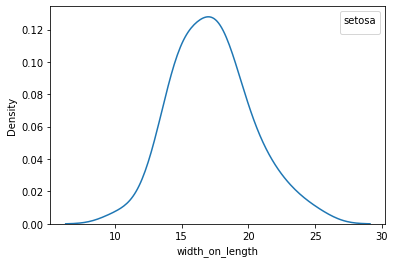

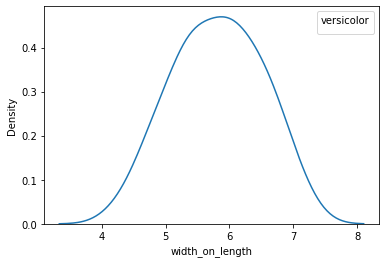

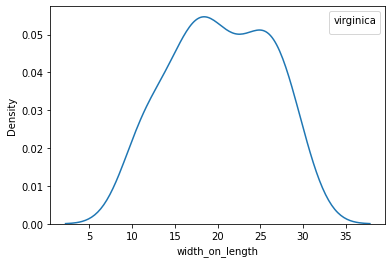

In [494]:
for spec in species_un:
  plt.figure()
  sns.kdeplot(iris[iris["species"] ==spec]["width_on_length"])
  plt.legend(title=spec)

### Задание 2 (0.5 балла)

Визуализируйте распределение width_on_length для каждого класса из `species` с помощью функции `sns.boxplot` (все классы изобразите на одном графике).

In [495]:
iris

,index,sepal_length,sepal_width,petal_length,petal_width,species,width_on_length
0,60,5.0,2.0,3.5,1.0,versicolor,4.285714
1,68,6.2,2.2,4.5,1.5,versicolor,4.546667
2,53,5.5,2.3,4.0,1.3,versicolor,4.743750
3,83,6.0,2.7,5.1,1.6,versicolor,4.764706
4,72,6.3,2.5,4.9,1.5,versicolor,4.821429
...,...,...,...,...,...,...,...
145,118,7.7,2.6,6.9,2.3,virginica,27.893734
146,100,6.3,3.3,6.0,2.5,virginica,28.964523
147,134,6.1,2.6,5.6,1.4,virginica,28.995017
148,143,6.8,3.2,5.9,2.3,virginica,29.151172


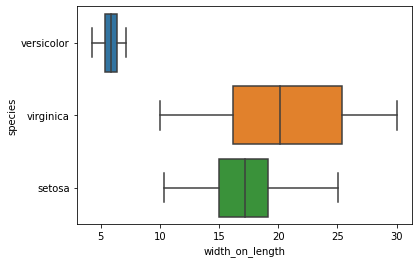

In [496]:
sns.boxplot(data=iris, x="width_on_length", y="species")


### Задание 3 (0.5 балла)

Постройте график зависимости `sepal_length` от `sepal_width` для класса `setosa` из `species` (в случае дублей в `sepal_width` - найдите среднее `sepal_length` для этого значения `sepal_width` и используйте его для построения графика)

In [497]:
df = iris[iris["species"] == "setosa"]

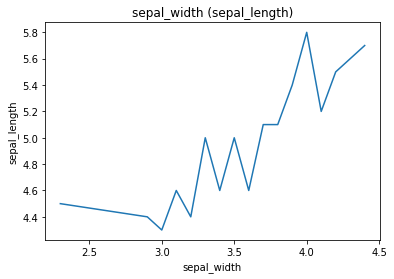

In [498]:
mapping = df.groupby("sepal_width").mean().to_dict()["sepal_length"]
df[df.duplicated()]["sepal_length"] = df[df.duplicated()]["sepal_width"].map(mapping)
df = df.drop_duplicates(subset=["sepal_width"])
plt.title("sepal_width (sepal_length)")
sns.lineplot(data=df, x='sepal_width', y="sepal_length")

### Задание 4 (1 балл)

Визуализируйте средние значения столбцов `sepal_length, sepal_width, petal_length, petal_width` для каждого класса из `species` в виде столбиковой диаграммы из любой библиотеки на ваш выбор, например `sns.barplot` или `pd.DataFrame.plot.bar` (изобразите все на одном графике).

In [499]:
import matplotlib.pyplot as plt

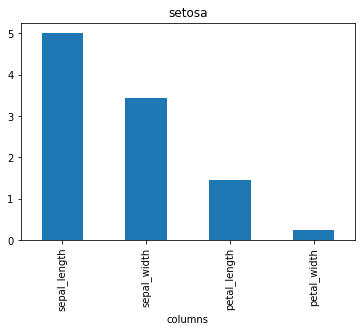

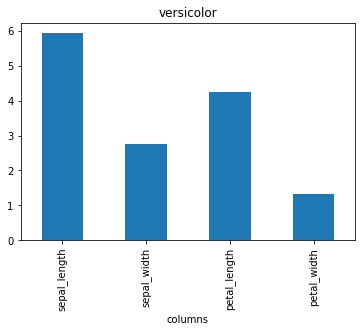

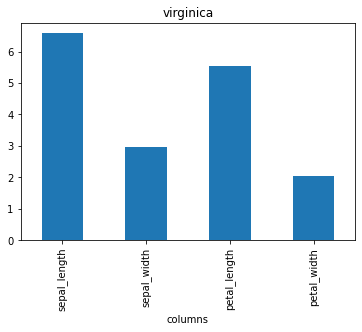

In [500]:
for spec in species_un:
  df = iris[iris["species"] == spec].drop(columns=["index", "species", "width_on_length"])
  fig = df.mean().plot.bar()
  plt.title(spec)
  plt.xlabel('columns')
  fig.set_xticklabels(df.columns)
  plt.show()